<a href="https://colab.research.google.com/github/bhatiaparteek/ml_with_python/blob/main/Chapter_21_RNN/predicing_trend_diesa_price_using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 1 — Data pre-processing

In [1]:
# Recurrent neural network
# Part 1— Data pre-processing
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Loading Training Data, select Diesel_Price_Train.csv (get this file from GitHub) to load

In [2]:
from google.colab import files

# Upload the file from your local system
uploaded = files.upload()
#select Diesel_Price_Train.csv to load, get this file from GitHub

Saving Diesel_Price_Train.csv to Diesel_Price_Train.csv


In [5]:
# Loading the training set
dataset_train=pd.read_csv('Diesel_Price_Train.csv')
training_set=dataset_train.iloc[:, 1:2].values

In [6]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [7]:
# Creating empty lists for developing the data structure with
# 120 timesteps and 1 output
x_train=[]
y_train=[]

In [8]:
# Appending data in x_train and y_train
for i in range(120, 5299):
    x_train.append(training_set_scaled[i-120:i,0])
    y_train.append(training_set_scaled[i, 0])
x_train,y_train=np.array(x_train),np.array(y_train)

# Reshaping
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

#Part 2 — Building the RNN

In [9]:
# Part 2—Building the RNN
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [10]:
# Initializing the RNN
regressor = Sequential()

In [11]:
# Adding the first LSTM layers and some dropout regularization
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some dropout regularization
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some dropout regularization
regressor.add(LSTM( units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layers and some dropout regularization
regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout( 0.2))

# Adding the output layer
regressor.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [24]:
# Fitting the RNN to the training set
regressor.fit (x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 41s 254ms/step - loss: 0.0028
Epoch 2/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 42s 260ms/step - loss: 0.0022
Epoch 3/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 80s 245ms/step - loss: 0.0022
Epoch 4/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 43s 267ms/step - loss: 0.0021
Epoch 5/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 38s 238ms/step - loss: 0.0018
Epoch 6/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 41s 236ms/step - loss: 0.0018
Epoch 7/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 41s 238ms/step - loss: 0.0016
Epoch 8/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 41s 236ms/step - loss: 0.0017
Epoch 9/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 42s 243ms/step - loss: 0.0015
Epoch 10/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 41s 252ms/step - loss: 0.0020
Epoch 11/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 82s 251ms/step - loss: 0.0014
Epoch 12/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 40s 247ms/step - loss: 0.0014
Epoch 13/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 40s 241ms/step - loss: 0.0013
Epoch 14/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 41s 241ms/step - loss: 0.0013
E

#Part 3—Making the predictions and visualizing the results

Loading the Testing Data, select Diesel_Price_Test.csv (get this file from GitHub) to load

In [16]:
from google.colab import files

# Upload the file from your local system
uploaded = files.upload()
#select Diesel_Price_Test.csv to load

Saving Diesel_Price_Test.csv to Diesel_Price_Test.csv


In [30]:
# Part 3—Making the predictions and visualizing the results
# getting the real diesel price
dataset_test=pd.read_csv('Diesel_Price_Test.csv')
diesel_price=dataset_test.iloc[:, 1:2].values

In [31]:
# Getting the predicted diesel price
dataset_total=pd.concat((dataset_train['Delhi Diesel Price'], dataset_test['Delhi Diesel Price']), axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-120:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

In [32]:
# Creating desired 3D structure for test data
x_test=[]
for i in range(120, 200):
    x_test.append(inputs[i-120:i, 0])

In [33]:
# Converting x_test to array and creating 3D structure
x_test=np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [34]:
# Making the predictions
predicted_diesel_price=regressor.predict(x_test)
predicted_diesel_price=sc.inverse_transform(predicted_diesel_price)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


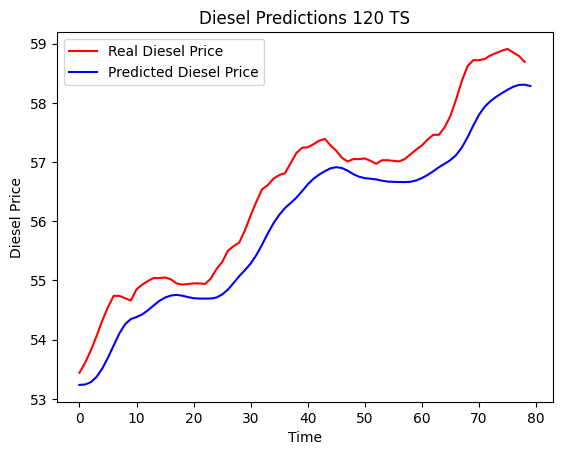

In [35]:
# Visualizing the results
plt.plot(diesel_price, color='red',label='Real Diesel Price')
plt.plot(predicted_diesel_price, color='blue',label='Predicted Diesel Price')
plt.title('Diesel Predictions 120 TS')
plt.xlabel('Time')
plt.ylabel('Diesel Price')
plt.legend()
plt.savefig('DieselTS', dpi=2500)
plt.show()